<a href="https://colab.research.google.com/github/foxtrotmike/PCA-Tutorial/blob/master/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Un enfoque de Minimización de Riesgo Estructural para el Análisis de Componentes Principales

## por 

## Fayyaz Minhas

El objetivo de este tutorial es proporcionar una descripción fundamental (aunque algo simplificada) del análisis de componentes principales en un enfoque de "aprender haciendo", en el que se te hacen preguntas que puedes responder jugando con el código incluido en el tutorial.

¿Cómo podemos encontrar dimensiones redundantes o con poca o ninguna información en un conjunto de datos? Recuerda que, para una variable dada, la cantidad de información en ella es proporcional a su varianza -- si todos los datos son constantes, entonces su varianza es cero y también lo es su contenido de información. Si tenemos datos de muy alta dimensión, podemos reducir su dimensionalidad proyectándolo a lo largo de direcciones (o vectores) tales que la varianza a lo largo de la dirección elegida sea máxima para preservar la mayor cantidad de información posible en los datos. Por ejemplo, considera dos variables (relacionadas): altura y peso de todos los individuos en una clase. Si podemos predecir el peso a partir de la altura entonces no necesitamos almacenar la dimensión de peso para todos los puntos de datos. Sin embargo, sin un sistema de predicción así, o si no hay relación entre peso y altura, será imposible reconstruir el peso a partir de la altura y la información del peso se perderá para siempre si se elimina la dimensión de peso. Por otro lado, si el peso de un individuo depende linealmente de su altura, es decir, $w \approx ah+b$, entonces podemos ajustar una línea simple para obtener uno a partir del otro reduciendo el error entre el valor real del peso y el valor predicho en base a la altura (llamado error de reconstrucción). Si el error de reconstrucción es bajo, simplemente podemos almacenar el predictor lineal $(a,b)$ y los valores de altura y descartar el peso sin mucha pérdida de información.

El análisis de componentes principales es un método para encontrar direcciones ortogonales de máxima varianza en los datos, de modo que si los datos se proyectan en esas direcciones, la varianza de los datos proyectados es máxima. La dimensionalidad de los datos puede reducirse proyectándolos en esas direcciones. Esta proyección a lo largo de la dirección de máxima varianza da la mínima pérdida de información.

A continuación, discutimos cómo encontrar la dirección de máxima varianza para un conjunto de datos dado corresponde a encontrar el vector propio de la matriz de covarianza de los datos y cómo esto lleva a una mínima pérdida de información si los datos se proyectan en esa dirección.

Supongamos que se nos dan $N$ puntos de datos de $d$ dimensiones $\mathbf x_i, i=1...N$. Queremos encontrar el vector de dirección $\mathbf w$ tal que la proyección $z_i=\mathbf w^T \mathbf x_i$ para un punto $\mathbf x_i$ tenga máxima varianza.

Para encontrar la dirección de máxima varianza, necesitaremos desarrollar una fórmula matemática que nos ayude a calcular la varianza de los datos después de haber sido proyectados a lo largo de cierta dirección para que podamos buscar la dirección de máxima varianza optimizando esa fórmula. Calculemos la varianza después de proyectar los datos a lo largo de $\mathbf w$. Sabemos que la varianza de los valores $z_i, i=1...N$ es el valor esperado (promedio) de la desviación cuadrada $(z_i-\mu_z)$ respecto al valor medio $\mu_z = \frac{1}{N}\sum_{i=1}^{N}z_i=\frac{1}{N}\sum_{i=1}^{N}\mathbf w^T\mathbf x_i=\mathbf w^T\frac{1}{N}\sum_{i=1}^{N}\mathbf x_i=\mathbf w^T\mu_x$ donde $\mathbf{\mu_x}=\frac{1}{N}\sum_{i=1}^{N}\mathbf x_i$ es el vector de $d$ dimensiones de valores promedio de todos los puntos de datos a lo largo de cada una de las $d$ dimensiones. Por lo tanto,

$var(z)=var(\mathbf w^T \mathbf x)=\frac{1}{N}\sum_{i=1}^{N}[(\mathbf w^T \mathbf x_i-\mathbf w^T\mathbf\mu_x)^2]$

$=\frac{1}{N}\sum_{i=1}^{N}[(\mathbf w^T\mathbf x_i-\mathbf w^T\mathbf\mu_x)(\mathbf w^T\mathbf x_i-\mathbf w^T\mathbf\mu_x)]$

$=\frac{1}{N}\sum_{i=1}^{N}[(\mathbf w^T\mathbf x_i-\mathbf w^T\mathbf\mu_x)(\mathbf x_i^T\mathbf w-\mathbf \mu_x^T \mathbf w)]$

$=\frac{1}{N}\sum_{i=1}^{N}[\mathbf w^T(\mathbf x_i-\mathbf \mu_x)(\mathbf x_i-\mathbf \mu_x)^T\mathbf w]$

$=\mathbf w^T\frac{1}{N}\sum_{i=1}^{N}[(\mathbf x_i-\mathbf \mu_x)(\mathbf x_i-\mathbf \mu_x)^T]\mathbf w$

$=\mathbf w^T\mathbf C \mathbf w$

Aquí, $\mathbf C=\frac{1}{N}\sum_{i=1}^{N}[(\mathbf x_i-\mathbf \mu_x)(\mathbf x_i-\mathbf \mu_x)^T]$ es la matriz de "covarianza" de tamaño $d \times d$. La covarianza de dos variables $a$ y $b$ sobre $N$ valores $a_i,b_i, i=1...N$ está dada por $c(a,b) = \frac{1}{N}\sum_{i=1}^{N}[(a_i-\mu_a)(b_i-\mu_b)^T]$ y es una medida de la relación lineal entre dos variables - en nuestro caso dos dimensiones de $\mathbf x$ o dos de nuestras características. La covarianza será alta (positiva) si el aumento en los valores de una variable por encima de su media se correlaciona con el aumento en los valores de la otra variable por encima de la media de la otra variable. La covarianza será alta (negativa) si el aumento en los valores de una variable por encima de su media se correlaciona con la disminución en los valores de la otra variable por debajo de la media de la otra variable. La covarianza será baja (pequeña positiva o negativa) si el aumento en los valores de una variable por encima de su media tiene poco efecto o poca correlación con el aumento en los valores de la otra variable por encima de la media de la otra variable. En nuestro ejemplo abajo, tomamos dos variables, altura y peso de una persona que se espera estén correlacionadas y exhiban alta covarianza. Es interesante notar que si tomamos una sola variable $b=a$ entonces la varianza se convierte en covarianza. Una matriz de covarianza de $d$ variables es una matriz $d \times d$ de todas las covarianzas por pares. Nota que la matriz de covarianza será simétrica ya que $cov(a,b)=cov(b,a)$.  Normalmente es mejor escalar las variables al mismo rango antes de calcular la covarianza para reducir los efectos de las diferencias en el rango de valores. Esto puede lograrse restando el valor de una variable de su media y dividiendo por su desviación estándar en un proceso llamado normalización media-desviación estándar (o estandarización).

Hasta ahora hemos expresado la varianza de los datos proyectados en términos de $\mathbf w$ usada para la proyección y la matriz de covarianza de los datos que puede calcularse de antemano. Recuerda que nos interesa encontrar la dirección de máxima varianza ya que la proyección de los datos dados en esa dirección implica la mínima pérdida de información. Ahora, usando el principio de minimización de riesgo estructural, el problema de aprendizaje de encontrar el vector de dirección óptimo $w$ que minimiza la pérdida de información después de la proyección mientras asegura regularización puede escribirse como:

$min_\mathbf w \alpha R(\mathbf w)+E(\mathbf w)$

Donde $E$ es el término de error y $R$ controla la (inversa de) regularización. Como el error está inversamente relacionado con la varianza de $z$, podemos escribir este problema de aprendizaje como sigue:

$min_\mathbf w \alpha ||\mathbf w||^2-var(z)$ (para $\alpha \ge 0$)

o

$min_\mathbf w \alpha \mathbf w^T\mathbf w -\mathbf w^TC\mathbf w$

Aquí, queremos minimizar el valor de la norma de $\mathbf w$ mientras maximizamos la varianza.

Tomando la derivada respecto a $\mathbf w^T$ y sustituyendo a cero, obtenemos:

$\mathbf C\mathbf w=\alpha \mathbf w$

Nota que hay una solución trivial a esto $\mathbf w = \mathbf 0$. Sin embargo, al restringir $||\mathbf w||=1$, podemos encontrar una solución no trivial. Para este propósito, nota que la ecuación anterior es un problema de valores propios con vector propio $\mathbf w$ y valor propio $\alpha$. Un vector propio $\mathbf w$ es una propiedad de una matriz $\mathbf C$ tal que el vector resultante de la multiplicación matricial $\mathbf C\mathbf w$ está en la misma dirección que $\mathbf w$ solo con un escalamiento por un factor constante correspondiente $\alpha$ llamado valor propio. El número de valores y vectores propios es igual al número de dimensiones de la matriz. Estos vectores de una matriz de covarianza se llaman componentes principales ya que corresponden a direcciones de varianza máxima. De ahí el nombre "Análisis de Componentes Principales".

Así, la dirección de máxima varianza $\mathbf w$ corresponde al vector propio de la matriz de covarianza $\mathbf C$. Así, si encontramos los vectores propios de la matriz de covarianza, ¡podemos obtener lo que queremos! A continuación, también discutimos un enfoque más simple, aunque más intensivo computacionalmente, para encontrar la dirección de máxima varianza usando un simple bucle.

Para entender mejor los conceptos discutidos hasta ahora, generemos algunos datos.

In [ ]:
import numpy as np
weights = np.array([73,95,72,69,76,82,95,89,89,83,94,89,103]) #in kg
heights = np.array([56,73,60,54,56,62,77,73,72,69,74,67,84,]) #in inches


¡Y grafiquémoslo!

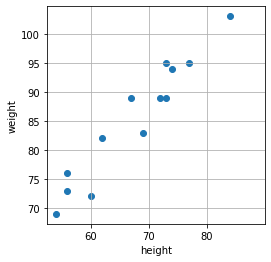

In [72]:
import matplotlib.pyplot as plt
plt.scatter(heights,weights)
plt.xlabel('height')
plt.ylabel('weight')
plt.axis('square')
plt.grid()
plt.show()

Convirtamos los datos en un arreglo numpy y obtengamos la media y desviación estándar de los datos junto con la varianza y covarianza:

In [74]:
X = np.vstack((heights,weights)).T #append the two dimensions to create the data matrix
#X = np.random.randn(100,2)
#X[:,1]+=0.5*X[:,0]
N,d = X.shape
print("The dimensions of X are",X.shape)
Xm = np.mean(X,axis=0)
Xs = np.std(X,axis=0)
Xv = np.var(X,axis=0)
print("The mean is",Xm)
print("The standard deviation is",Xs)
print("The variance is",Xv)

snapshot = False #See details on the Snapshot method below 
if not snapshot:
    Cx = np.cov(X.T, bias = True) # Determine dxd sized Cov. Matrix with normalization by N (Number of samples)
else:
    Cx = np.cov(X, bias = True) # Determine NxN sized Cov. Matrix

print("The co-variance matrix is\n",Cx)

The dimensions of X are (13, 2)
The mean is [67.46153846 85.30769231]
The standard deviation is [ 8.86319429 10.0566443 ]
The variance is [ 78.55621302 101.13609467]
[ 78.55621302 101.13609467]
The co-variance matrix is
 [[ 78.55621302  85.55029586]
 [ 85.55029586 101.13609467]]


La varianza y la covarianza se ven afectadas por la dispersión de los datos alrededor de la media. ¿Pero qué significan la varianza y la covarianza?

La varianza es simplemente la potencia de dispersión alrededor de la media: si las muestras de datos son muy diferentes entre sí, la varianza será alta y viceversa. Sin embargo, en nuestro contexto, es más importante tratar de entender la covarianza. Una covarianza positiva, como aquí, nos dice que las dos variables altura y peso "van juntas", es decir, en promedio, cuando la altura de una persona está por encima de la altura promedio, su peso también está por encima del peso promedio y viceversa. Si la covarianza fuera negativa, entonces, en promedio, cuando una variable está por encima de su media, la otra variable para la misma muestra está por debajo de su media y viceversa. Si la magnitud de la covarianza es alta, entonces podemos decir que una variable puede predecirse a partir de la otra usando un modelo lineal simple.

Para analizar más la covarianza, normalmente es útil estandarizar los datos haciendo que su media sea 0.0 y su desviación estándar 1.0. Esto puede hacerse abajo:

In [75]:
Xn = (X-Xm)/(Xs)
print("Mean after normalization",np.mean(Xn,axis=0))
print("Standard deviation after normalization", np.std(Xn,axis=0))
print("Variance after normalization", np.var(Xn,axis=0))
print("Total Variance after normalization", np.sum(np.var(Xn,axis=0)))

Mean after normalization [-6.31973106e-16  1.53723188e-16]
Standard deviation after normalization [1. 1.]
Variance after normalization [1. 1.]
Total Variance after normalization 2.0


Nota que la varianza total a lo largo de ambas direcciones es 2.0. Grafiquemos los datos. Observa que la tendencia de los datos es la misma mientras que la media ha cambiado a cero y la desviación estándar a uno, lo cual es equivalente a un desplazamiento y escalamiento de los datos.

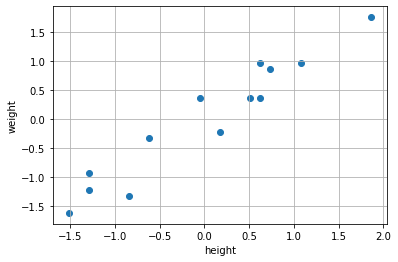

In [76]:
plt.scatter(Xn[:,0],Xn[:,1])
plt.grid()
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

Calculemos la matriz de covarianza. Nota que la matriz de covarianza es simétrica y semidefinida positiva (tiene valores propios no negativos). En la primera lectura del tutorial, ignora el código que corresponde a la variable snapshot siendo True.

In [84]:
if not snapshot:
    C = np.cov(Xn.T,bias = True) # Determine dxd sized Cov. Matrix with normalization by N (Number of samples)
else:
    C = np.cov(Xn,bias = True) # Determine NxN sized Cov. Matrix

print("Covariance matrix Dimensionality is: ",C.shape)
print("Covariance matrix is\n",C)

Covariance matrix Dimensionality is:  (2, 2)
Covariance matrix is
 [[1.         0.95979428]
 [0.95979428 1.        ]]


El componente diagonal de la matriz de covarianza $d \times d$ corresponde a las varianzas de las dos características que tenemos (que son 1.0 después de la estandarización) y los elementos fuera de la diagonal corresponden a la covarianza entre nuestras dos características. Nota que la covarianza es bastante alta como también se observa en el diagrama de dispersión. Como consecuencia, debería ser posible reducir las dos dimensiones a una sola con mínima pérdida de información. Además, nota que la varianza siempre es mayor que la covarianza.

Como se discutió arriba, la dirección de máxima varianza de un conjunto de datos dado está dada por los vectores propios (o componentes principales) de la matriz de covarianza. Calculemos los valores propios y los componentes principales. Una vez que se ha calculado un componente principal $\mathbf w$, podemos proyectar nuestros datos a lo largo de él por $z = \mathbf w^T \mathbf x$ o en forma matricial $\mathbf X_{n_{(N \times d)}}\mathbf W_{(d \times d)}$, donde $\mathbf W$ es la matriz de componentes principales. Luego podemos ordenar los componentes principales en orden descendente respecto a la cantidad de varianza capturada a lo largo de esos componentes principales. También graficaremos el gráfico scree que muestra la fracción de varianza capturada a lo largo de cada dimensión.

The eigen vectors (principal components) are 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
The variance captured along each PC: [1.95979428 0.04020572]
The fraction of variance captured along each PC:  [0.97989714 1.        ]
The eigen values are:  [1.95979428 0.04020572]
The fraction of eigen values along each PC:  [0.97989714 1.        ]


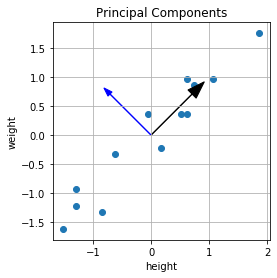

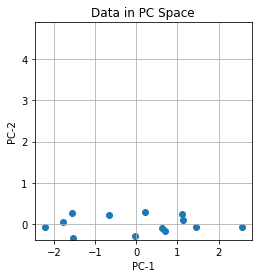

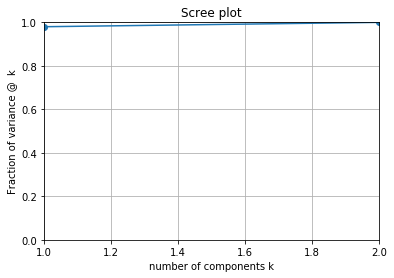

In [85]:
ev,pc = np.linalg.eig(C)
ev = np.abs(ev)

if snapshot: #ignore on the first reading
    pc = np.dot(Xn.T,pc[:,:d])
    pc/= np.linalg.norm(pc,axis=0)
    pc = np.real(pc)
    
cvar =  np.var(np.dot(Xn,pc),axis=0)
idx = np.argsort(-cvar)
cvar = cvar[idx]
pc = pc[:,idx]

print("The eigen vectors (principal components) are \n",pc)
print("The variance captured along each PC:",cvar)
print("The fraction of variance captured along each PC: ",np.cumsum(cvar)/np.sum(cvar))
if not snapshot:
    ev = ev[idx]
    print("The eigen values are: ",ev)
    print("The fraction of eigen values along each PC: ",np.cumsum(ev)/np.sum(ev))

plt.scatter(Xn[:,0],Xn[:,1])
plt.arrow(0,0,pc[0,0],pc[1,0],color='k',head_width=0.2)
plt.arrow(0,0,pc[0,1],pc[1,1],color='b',head_width=0.1)
plt.axis('square')
plt.xlabel('height')
plt.ylabel('weight')
plt.title("Principal Components")
plt.grid()
plt.show()

Z = np.dot(Xn,pc)
plt.scatter(Z[:,0],Z[:,1])
plt.axis('square')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.title("Data in PC Space")
plt.grid()
plt.show()
#plotting the scree plot
plt.plot(np.arange(len(cvar))+1,np.cumsum(cvar)/np.sum(cvar),'o-')
plt.axis([1,len(ev),0,1])
plt.xlabel("number of components k")
plt.ylabel("Fraction of variance @  k")
plt.grid()
plt.title("Scree plot")
plt.show()

La gráfica anterior muestra las direcciones de los componentes principales: Nota que:

1. Hay dos componentes principales: El que tiene la mayor varianza (valor propio) se llama primer componente principal mientras que el otro se llama segundo componente principal.
2. La varianza a lo largo del primer componente principal es mayor en comparación con el segundo.
3. La varianza a lo largo de la primera dirección proyectada es mayor que la varianza a lo largo de las características originales que es 1.0 después de la normalización. Así, el componente principal es una dirección que captura más información que cualquiera de las características originales por sí sola.
4. La norma de cada uno de los componentes principales es 1.0.
5. Los dos componentes principales son ortogonales entre sí.
6. Como consecuencia de 2-4 arriba, la matriz de componentes principales y su transpuesta son inversas entre sí, es decir, $\mathbf {W}^{-1}=\mathbf {W}^{T}$ o $\mathbf {W}^{T}\mathbf W=\mathbf I$.
7. Los valores propios corresponden a la cantidad de varianza capturada: La fracción de varianza capturada a lo largo de una dirección es exactamente igual a la fracción de valores propios. Así, el primer componente principal corresponde al mayor valor propio y así sucesivamente.
8. El gráfico de la fracción de varianza capturada hasta $k$ componentes principales (llamado gráfico scree) puede usarse para seleccionar cuántos componentes principales retener al reducir la dimensionalidad. Para los datos originales usados en este ejemplo, hasta el 98% de la varianza está a lo largo del primer componente principal. Por lo tanto, si se elimina el segundo componente principal, la pérdida de información será solo de ~2%.

In [81]:
pc1 = pc[:,0]
pc2 = pc[:,1]
print('Dot product of the first two principal components:',np.dot(pc1,pc2))
print('Norm of the first two principal components:',np.linalg.norm(pc1),np.linalg.norm(pc1))

print("The principle component matrix multiple by its transpose:\n",np.dot(pc.T,pc))

Dot product of the first two principal components: 0.0
Norm of the first two principal components: 1.0 1.0
The principle component matrix multiple by its transpose:
 [[ 1.00000000e+00 -1.01465364e-17]
 [-1.01465364e-17  1.00000000e+00]]


Reduzcamos la dimensionalidad a "$k$" dimensiones. Nota que la proyección es $ z = \mathbf w_{{(d \times 1)}}^T\mathbf x_{(d \times 1)}$ que puede escribirse como la operación matricial: $\mathbf Z_{(N \times k)} = \mathbf X_{{(N \times d)}}\mathbf W_{(d \times k)}$

In [87]:
k = 1
W = pc[:,0:k] #selecting upto dr principal components only
Z = np.dot(Xn,W)
print("Data after transformation\n",Z)
print("Standard deviation after transformation",np.std(Z,axis=0))
print("Variance after transformation",np.var(Z,axis=0))
print("Fraction of variance captured along the projections: ",np.var(Z,axis=0)/np.sum(np.var(Xn,axis=0)))

Data after transformation
 [[-1.77978638]
 [ 1.12334857]
 [-1.53097826]
 [-2.22059623]
 [-1.56884918]
 [-0.66829402]
 [ 1.44246909]
 [ 0.70147418]
 [ 0.62169406]
 [-0.03952072]
 [ 1.1328163 ]
 [ 0.22279341]
 [ 2.56342918]]
Standard deviation after transformation [1.39992653]
Variance after transformation [1.95979428]
Fraction of variance captured along the projections:  [0.97989714]


Calculemos la dirección de máxima varianza usando una simple búsqueda basada en bucle for para verificar que realmente hemos encontrado la respuesta correcta. Generaremos vectores unitarios a lo largo de un círculo unitario y calcularemos la varianza de los datos después de la proyección a lo largo de un vector dado. Mostramos el diagrama de dispersión de los datos superpuesto por vectores de proyección cuya longitud se ha fijado igual a la varianza de los datos proyectados en esa dirección. También graficaremos la varianza vs. el ángulo/dirección del vector unitario. Nota que la mayor desviación estándar corresponde a los primeros vectores propios.

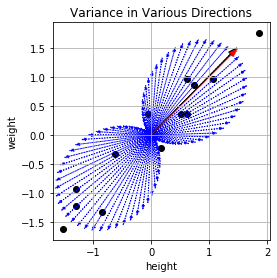

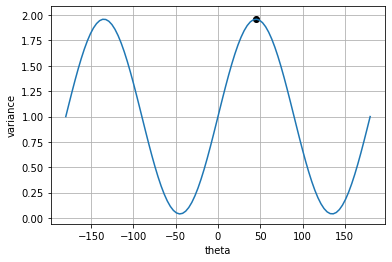

Maximum Variance: 1.959673466454711
Direction of Maximum Variance: [0.7014748877063212, 0.712694171378863]


In [83]:
import numpy as np
theta = (2*np.linspace(0,1,100)-1)*np.pi
vx = np.zeros(theta.shape[0])
maxv = 0
best_w = None
best_theta = 0
for i,t in enumerate(theta):
    wt = [np.cos(t),np.sin(t)]
    vx[i]=np.var(np.dot(wt,Xn.T))
    plt.arrow(0,0,vx[i]*wt[0],vx[i]*wt[1],color='b',head_width=0.05,linestyle=':')
    if vx[i]>maxv:
        maxv = vx[i]
        best_w = wt
        best_theta = t
plt.scatter(Xn[:,0],Xn[:,1],color='k')
plt.arrow(0,0,maxv*best_w[0],maxv*best_w[1],color='k',head_width=0.1)
plt.arrow(0,0,cvar[0]*pc[0,0],cvar[0]*pc[1,0],color='r',head_width=0.1,linestyle=':')

plt.grid()
plt.xlabel('height')
plt.ylabel('weight')
plt.axis('square')
plt.title("Variance in Various Directions")
plt.show()


plt.plot(theta*180/np.pi,vx)
plt.scatter(best_theta*180/np.pi,maxv,color = 'k')
plt.xlabel("theta")
plt.ylabel("variance")
plt.grid()
plt.show()
print("Maximum Variance:",maxv)
print("Direction of Maximum Variance:",best_w)



Ahora, calculemos la proyección inversa. Nota que, las proyecciones pueden escribirse como $\mathbf z = \mathbf W^T \mathbf x$, por lo tanto, la proyección inversa (reproyección) puede escribirse como $\mathbf x^r = \mathbf {W}^{-1} \mathbf z$. Ya sabemos que $\mathbf {W}^{-1} = \mathbf {W}^{T}$. Podemos usar esto para calcular la transformación inversa usando $\mathbf x^r = \mathbf {W}^{-1} \mathbf z = \mathbf {W}^{T} \mathbf z $. En forma matricial tenemos $\mathbf X^r = \mathbf Z \mathbf W^T=\mathbf X \mathbf W \mathbf W^T$.

(1, 2)


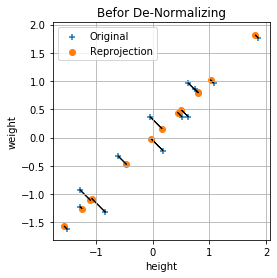

In [100]:
iW = W.T
Xr = np.dot(Z,iW)#*Xs+Xm
plt.scatter(Xn[:,0],Xn[:,1],marker = '+')
plt.scatter(Xr[:,0],Xr[:,1])
plt.legend(['Original','Reprojection'])
for x,xr in zip(Xn,Xr):    
    plt.arrow(x[0],x[1],xr[0]-x[0],xr[1]-x[1])
plt.axis('square')
plt.xlabel('height')
plt.ylabel('weight')
plt.grid()
plt.title('Befor De-Normalizing')
plt.show()

Desnormalizaremos los datos multiplicando el vector de desviaciones estándar y sumando el vector de medias. Luego graficamos los puntos reproyectados.

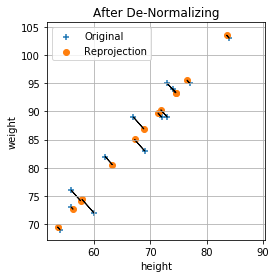

In [101]:
iW = W.T
Xr = np.dot(Z,iW)*Xs+Xm
plt.scatter(X[:,0],X[:,1],marker = '+')
plt.scatter(Xr[:,0],Xr[:,1])
plt.legend(['Original','Reprojection'])
for x,xr in zip(X,Xr):    
    plt.arrow(x[0],x[1],xr[0]-x[0],xr[1]-x[1])
plt.axis('square')
plt.xlabel('height')
plt.ylabel('weight')
plt.grid()
plt.title('After De-Normalizing')
plt.show()

El error de reproyección o reconstrucción sobre los datos normalizados puede calcularse como: $\sum_{i=1}^{N}\left\lVert \mathbf x_i - \mathbf x^r_i \right\rVert^2=\left\lVert \mathbf X - \mathbf X^r \right\rVert_F^2$, donde $\mathbf x^r = \mathbf {W}^{-1} \mathbf z = \mathbf {W}^{T} \mathbf z $ y $\mathbf X^r=\mathbf Z \mathbf W^T$.

Como se muestra abajo, el error de reconstrucción promedio es igual a la diferencia entre la varianza total y la varianza a lo largo de la dirección de proyección.

Así, la dirección de máxima varianza es la dirección de mínima pérdida de información así como el mínimo error de reconstrucción. Por lo tanto, la función objetivo de PCA también puede escribirse como:

$min_{\mathbf W}\left\lVert \mathbf X - \mathbf X \mathbf W \mathbf W^T \right\rVert_F^2$ 

sujeto a la restricción

$\mathbf W^T \mathbf W = \mathbf I$.


In [102]:
print("Average Reconstruction Error over normalized data: ",np.mean(np.linalg.norm(np.dot(Z,iW)-Xn,axis=1)**2))
print("Difference between total variance and variance along projection:",np.sum(np.var(Xn,axis=0))-np.sum(np.var(Z,axis=0)))


Average Reconstruction Error over normalized data:  0.04020572200691667
Difference between total variance and variance along projection: 0.040205722006916744


Como se discutió antes, el error de reconstrucción es igual a la varianza que se pierde debido a la proyección. En otras palabras, PCA puede interpretarse como: 1) Proyectar los datos a lo largo de la dirección de máxima varianza, o equivalentemente, 2) Proyectar los datos a lo largo de la dirección en la que el error de reproyección es mínimo. Así, la función de pérdida para PCA es el error de reproyección que es equivalente al negativo de la cantidad de varianza capturada.

¡Eso es todo amigos!

### Método Snapshot

Nota que la matriz de covarianza $\mathbf C=\frac{1}{N}\sum_{i=1}^{N}[(\mathbf x_i-\mathbf \mu_x)(\mathbf x_i-\mathbf \mu_x)^T]\equiv \mathbf X_n \mathbf X_n^T$ calculada arriba es de $d \times d$. Aquí, $\mathbf X_n$ es la matriz de datos normalizados de tamaño $d \times N$. Sin embargo, si $d>N$, como en el caso de datos de imágenes, sería computacionalmente más eficiente formular una matriz de covarianza equivalente $\mathbf C'\equiv \mathbf X_n^T \mathbf X_n$ de tamaño $N \times N$ y encontrar sus vectores propios $N \times 1$ $\mathbf w'$ que luego pueden usarse para calcular los vectores propios $d \times 1$ $\mathbf w$ de $\mathbf C$ por $\mathbf w = \mathbf X_n^T \mathbf w'$ y normalizando $\mathbf w$ a norma unitaria. Esto se llama el método snapshot y se usa ampliamente para casos en los que $d>N$. Puedes probar este método configurando la variable 'snapshot' en True en el código anterior.

### Ejercicios

Esto es lo que puedes hacer:

1. Cambia los datos y observa su impacto. Puedes cambiarlos agregando algo de ruido gaussiano usando la función np.random.randn. Observa cómo esto afecta el diagrama de dispersión, la matriz de covarianza, el gráfico scree y los componentes principales y sus valores propios.

2. ¿Puedes superponer los componentes principales de tus datos como vectores sobre el diagrama de dispersión para ver si realmente se está encontrando la dirección de máxima varianza?

3. Intenta cambiar el número de dimensiones reducidas de 1 a 2. ¿Qué sucede? Explica tus observaciones.

4. Observa cómo puedes aplicar PCA desde la librería scikit-learn y usarlo para clasificación o regresión junto con un modelo de aprendizaje automático apropiado. Es importante notar que PCA es una técnica no supervisada y las etiquetas o valores objetivo no deben usarse al determinar los componentes principales.

5. ¿Cómo aplicamos PCA sobre datos no vistos previamente?

6. ¿Cómo puede usarse PCA para la visualización de datos de alta dimensión?

7. ¿Cómo se usa PCA en Eigen Faces para reconocimiento facial?

8. ¿Cómo puede usarse PCA para clustering? (opcional)

9. ¿Cuáles son los supuestos subyacentes de PCA? (opcional)

10. ¿Cuáles son las limitaciones de PCA? (opcional)

11. ¿Cómo puede kernelizarse PCA? (opcional)

12. ¿Qué sucede si proyectas los datos solo sobre el segundo componente principal? (opcional)

13. Si el número de características es grande, entonces la matriz de covarianza será enorme. ¿Cómo podemos aplicar PCA a datos de alta dimensión? (Pista: Método Snapshot para PCA)

14. ¿Cómo puede usarse PCA para transmisión de datos?

### Aplicación: Eigen Dígitos

Apliquemos PCA al conjunto de datos MNIST que consiste en imágenes de 8 por 8 de números. Podemos usar la herramienta PCA de scikit-learn. Este enfoque es muy similar a Eigen faces que se usan para reconocimiento facial. Podemos llamarlo "Eigen Dígitos".

Carguemos los datos usando sklearn.

(1797, 64)


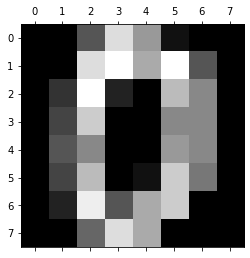

In [108]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
plt.matshow(digits.data[0].reshape(8,8),cmap='gray')

Apliquemos PCA a estos datos. Mantendremos el número de componentes principales igual al número de dimensiones (64) para ver cuánta varianza podemos capturar al aumentar el número de componentes. Esto puede hacerse usando el gráfico scree que muestra la proporción de varianza capturada vs. el número de componentes usados.

¿Cuántos componentes se requieren para capturar el 90% de la varianza?

¿Cuántos componentes se requieren para una reconstrucción casi perfecta?

(1797, 64)
(1797, 64)


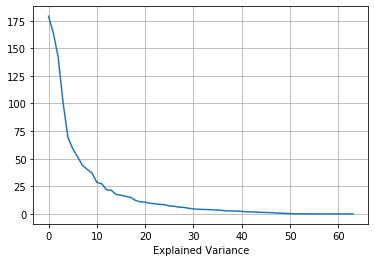

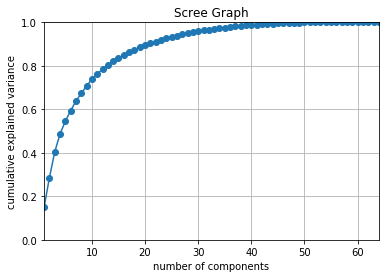

In [124]:
from sklearn.decomposition import PCA #import PCA
pca64 = PCA(n_components=64)
pca64.fit(digits.data) #training PCA
projected = pca64.transform(digits.data) #projecting the data onto Principal components
print(digits.data.shape)
print(projected.shape)
plt.plot(pca64.explained_variance_); plt.grid();
plt.xlabel('Explained Variance')
plt.figure()
plt.plot(np.arange(len(pca64.explained_variance_ratio_))+1,np.cumsum(pca64.explained_variance_ratio_),'o-') #plot the scree graph
plt.axis([1,len(pca64.explained_variance_ratio_),0,1])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title('Scree Graph')
plt.grid()
plt.show()

Mostremos los datos originales y los datos proyectados como imágenes. Tomamos dos dígitos arbitrarios y vemos el efecto de aplicar PCA. Nota que los dígitos proyectados no se parecen a los originales pero definitivamente son diferentes entre sí. Nota que los dígitos proyectados tienen un gran número de dimensiones igual a cero.

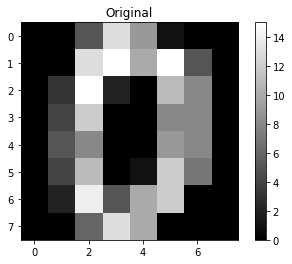

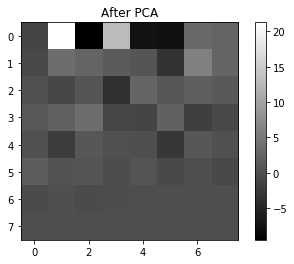

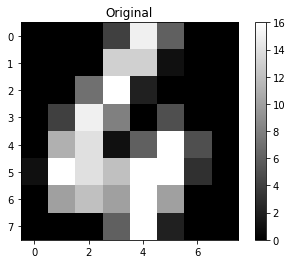

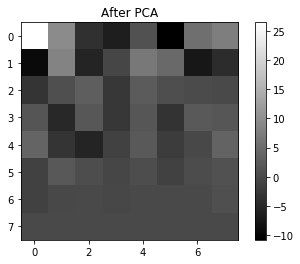

In [125]:
plt.imshow(digits.data[0,:].reshape(8,8),cmap='gray'); plt.title('Original'); plt.colorbar(); plt.show()
plt.imshow(projected[0,:].reshape(8,8),cmap='gray'); plt.title('After PCA');  plt.colorbar(); plt.show()
plt.imshow(digits.data[900,:].reshape(8,8),cmap='gray'); plt.title('Original'); plt.colorbar(); plt.show()
plt.imshow(projected[900,:].reshape(8,8),cmap='gray'); plt.title('After PCA');  plt.colorbar();plt.show()


### PCA para visualización

PCA puede usarse para visualización. Grafiquemos dos componentes principales entre sí. Esto nos permite visualizar datos de 64 dimensiones en dos dimensiones para análisis exploratorio de datos. Como puedes ver abajo, se obtiene un buen agrupamiento en el espacio PCA en el que ejemplos similares correspondientes al mismo dígito se agrupan juntos.

¿Qué dígitos son más similares entre sí?

¿Qué sucede cuando cambias los componentes principales para la visualización?

¿Puedes encontrar los componentes principales que proveen la mejor separación entre clases?

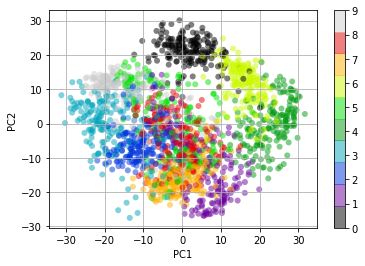

In [126]:
i1 = 0 #first principal component
i2 = 1 #second principal component
plt.scatter(projected[:, i1], projected[:, i2],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10));
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar();
plt.show()

Nota que los componentes principales son vectores de 64 dimensiones que pueden verse como dígitos. Abajo, mostramos los dos componentes principales seleccionados arriba y el componente principal correspondiente a la menor varianza. Estas imágenes muestran qué tipo de patrones se están aprendiendo. Observa que el borde exterior es cero para todos los componentes principales porque no hay dígitos ahí, así que la imagen puede reducirse fácilmente en dimensiones.

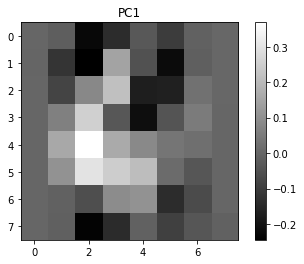

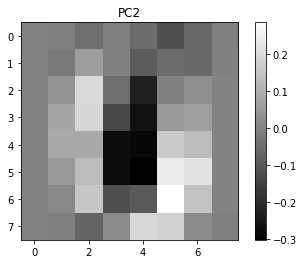

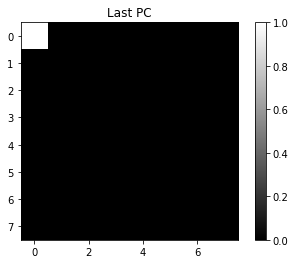

In [118]:
plt.imshow(pca64.components_[i1,:].reshape(8,8),cmap='gray'); plt.title('PC1'); plt.colorbar(); plt.show()
plt.imshow(pca64.components_[i2,:].reshape(8,8),cmap='gray'); plt.title('PC2'); plt.colorbar(); plt.show()
plt.imshow(pca64.components_[-1,:].reshape(8,8),cmap='gray'); plt.title('Last PC'); plt.colorbar(); plt.show()

### Reconstrucción con PCA
Ahora reduciremos las dimensiones de la imagen de $(d,d)$ a $(d_r,d_r)$ eligiendo las dimensiones usando PCA. Nota que esto es diferente de redimensionar la imagen, lo que puede incurrir en una gran pérdida de información en comparación con PCA. Así, una imagen (3,3) de 9 dimensiones permitiría una reconstrucción casi perfecta a la imagen original pero una reducción de (64,64) a (3,3) puede afectar severamente la imagen. Abajo mostramos la imagen original, transformada y reconstruida.

Pruébalo con diferentes dígitos.

¿Cuál es el efecto de cambiar el número de dimensiones o la precisión de reconstrucción?

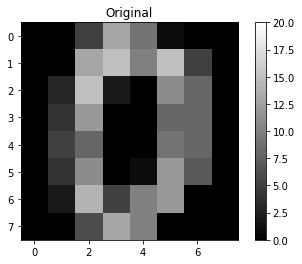

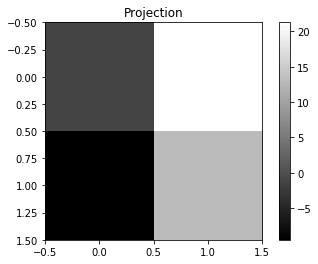

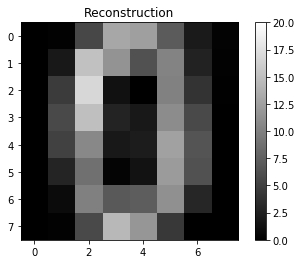

In [120]:
dr = 2
pca = PCA(n_components=dr*dr)
components = pca.fit_transform(digits.data)
reconstruction = pca.inverse_transform(components)
plt.imshow(digits.data[0,:].reshape(8,8),cmap='gray',vmin=0,vmax=20); plt.title('Original'); plt.colorbar(); plt.show()
plt.imshow(components[0,:].reshape(dr,dr),cmap='gray'); plt.title('Projection'); plt.colorbar(); plt.show()
plt.imshow(reconstruction[0,:].reshape(8,8),cmap='gray',vmin=0,vmax=20); plt.title('Reconstruction'); plt.colorbar(); plt.show()

(c) Dr. Fayyaz Minhas